# Student Performance Indicator

## Lifecycle of Machine Learning project

* Understanding the problem statement
* Data Collection
* Data checks to perform
* Exploratory Data Analysis (EDA)
* Data Pre-processing
* Model Training
* Choose the Best Model (Model Selection)


### 1) Problem Statement

* This project understand how the student's performance (test scores) are affected by other variables such as Gender, Ethnicity, Parental level of Education, Lunch and Test preparation course

### 2) Data Collection

* Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
* The data consists of 8 column and 1000 rows.

#### 2.1) Importing Data and Required Packages

* Importing Pandas, Numpy, Matplotlib, Seaborn and Warning Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

* Import the CSV Data as Pandas DataFrame

In [2]:
df=pd.read_csv('C:\\temp\\Student Performance\\StudentsPerformance.csv')

* Show Top 5 Records

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


* Shape of the dataset

In [4]:
df.shape

(1000, 8)

### 2.2 Dataset information

* gender : sex of students -> (Male/female)
* parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
* lunch : having lunch before test (standard or free/reduced)
* test preparation course : complete or not complete before test
* math score
* reading score
* writing score

### 3. Data Checks to perform

* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column



#### 3.1 Check Missing values

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

* There are no missing values

#### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

0

* There are no duplicate values in dataset

#### 3.3 Check data types

In [7]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Check the number of unique values of each column

In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### 3.5 Check statistics of data set

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight

* From the above descriptions of numerical data, all means are closer to each other between **66.08** to **69.16**.
* All standard deviations are also close to each other between **15.16** to **15.19**
* Minimum match score = **0**, while writing score = **10** and reading score is much higher = **17**.

#### 3.7 Exploring Data

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
print("Categorical in 'gender' variable: ", df['gender'].unique())
print("Categorical in 'race/ethnicity' variable: ", df['race/ethnicity'].unique())
print("Categorical in 'parental level of education' variable: ", df['parental level of education'].unique())
print("Categorical in 'lunch' variable: ", df['lunch'].unique())
print("Categorical in 'test preparation course	' variable: ", df['test preparation course'].unique())

Categorical in 'gender' variable:  ['female' 'male']
Categorical in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categorical in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categorical in 'lunch' variable:  ['standard' 'free/reduced']
Categorical in 'test preparation course	' variable:  ['none' 'completed']


In [13]:
#define numerical and categorical columns
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

#define columns
print('We have {} numerical features: {}'.format(len(numerical_features),numerical_features))
print('We have {} categorical features: {}'.format(len(categorical_features),categorical_features))
      

We have 3 numerical features: ['math score', 'reading score', 'writing score']
We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [14]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


#### 3.8 Adding columns for "Total Score" and "Average"

In [15]:
df['total score']=df['math score'] + df['reading score'] + df['writing score']
df['average']=df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
math_full_marks=df[df['math score']==100]['average'].count()
reading_full_marks=df[df['reading score']==100]['average'].count()
writing_full_marks=df[df['writing score']==100]['average'].count()

print('Number of students with full marks in Maths: {}'.format(math_full_marks))
print('Number of students with full marks in Reading: {}'.format(reading_full_marks))
print('Number of students with full marks in writing: {}'.format(writing_full_marks))

Number of students with full marks in Maths: 7
Number of students with full marks in Reading: 17
Number of students with full marks in writing: 14


In [17]:
math_less_20=df[df['math score']< 20]['average'].count()
reading_less_20=df[df['reading score']< 20]['average'].count()
writing_less_20=df[df['writing score']< 20]['average'].count()	

print('Number of students with less than 20 marks in Maths: {}'.format(math_less_20))
print('Number of students with less than 20 marks in Reading: {}'.format(reading_less_20))
print('Number of students with less than 20 marks in Writing: {}'.format(writing_less_20))

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Reading: 1
Number of students with less than 20 marks in Writing: 3


#### Insights

* From above values, We get students who have performed worst in Maths.
* Best performance in Reading.

### 4. Exploring Data (Visualization)

#### 4.1 Visualize average score distribution to make some conclusion.

* Histogram
* Kernal Density Estimation (KDE)

#### 4.1.1 Histogram & KDE

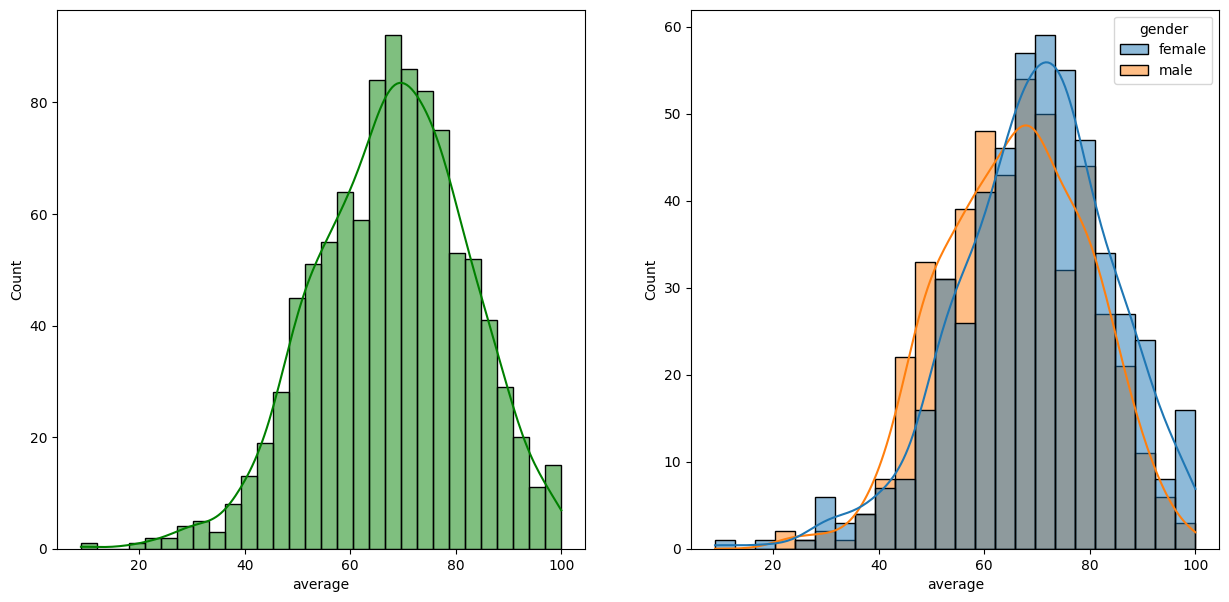

In [18]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', kde=True, bins=30, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

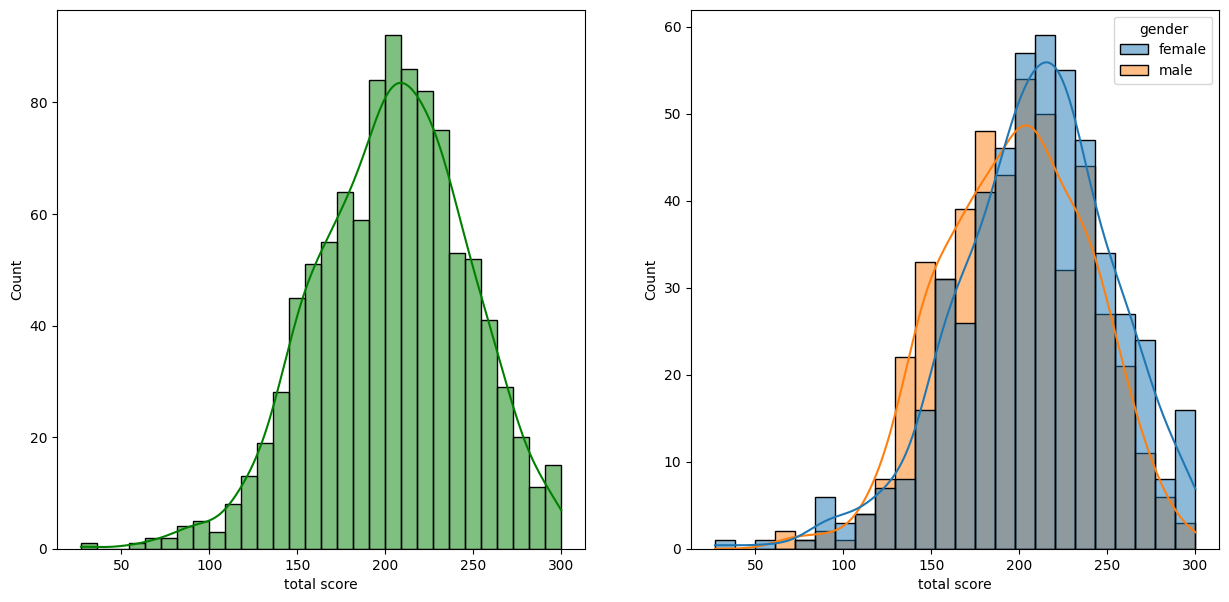

In [19]:
fig, ax= plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total score', kde=True, bins=30, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total score', kde=True, hue='gender')
plt.show()

#### Insights

* Female students tend to perform well as compared to male student.

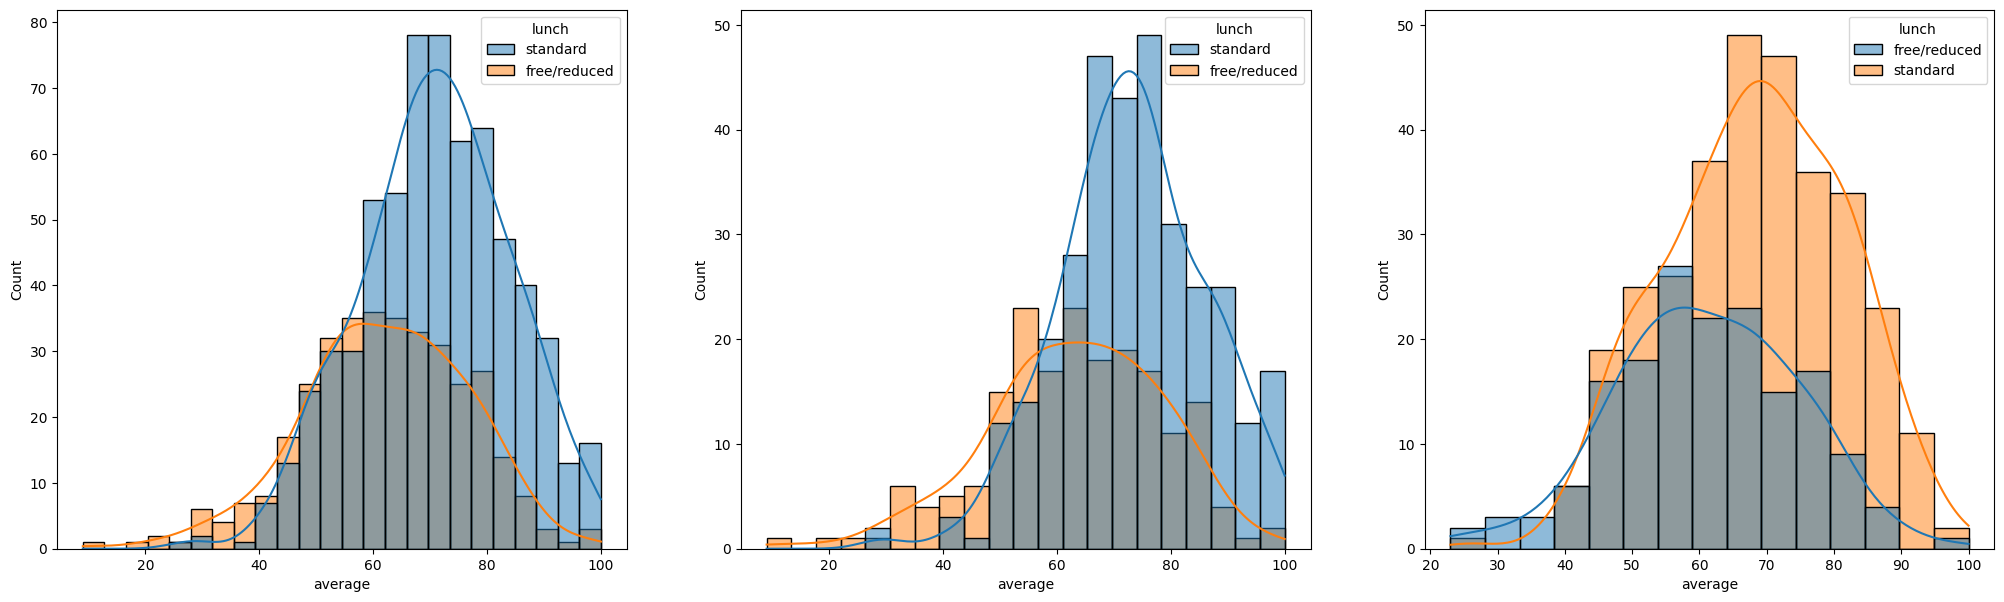

In [20]:
fig,ax=plt.subplots(1,3,figsize=(25,7))
plt.subplot(1,3,1)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(1,3,2)
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True, hue='lunch')
plt.subplot(1,3,3)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True, hue='lunch')
plt.show()

#### Insights

* Standard lunch helps perform well in exams for both the genders (male and female).

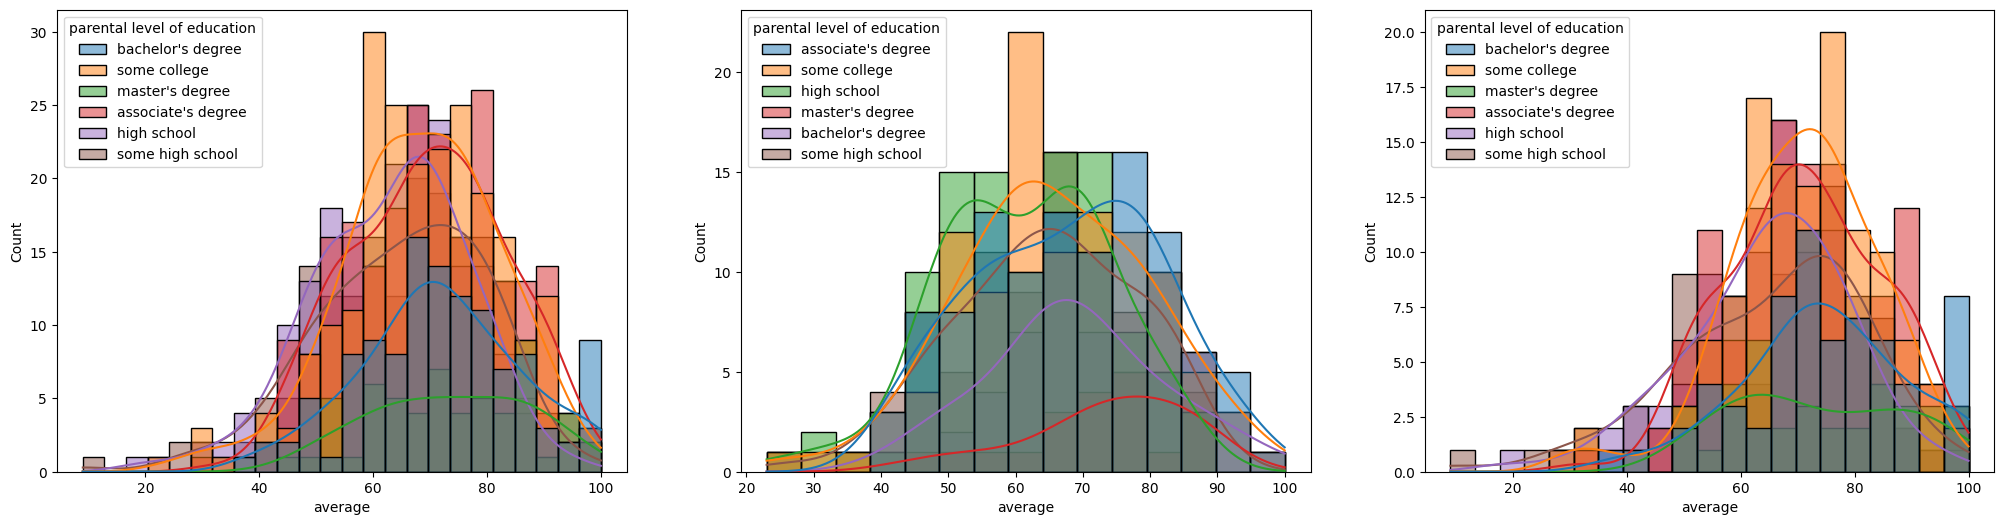

In [21]:
fig,ax=plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,3,1)
sns.histplot(data=df, x='average', kde=True, hue='parental level of education')
plt.subplot(1,3,2)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True, hue='parental level of education')
plt.subplot(1,3,3)
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

#### Insights

* In general parent's education level dont help student perform well in exam.
* In 2nd plot we see parent's whose education level is associate's degree or master's degree their male child tend to perform well in exam.
* In 3rd plot, we see there is no effect of parental education level on female students.

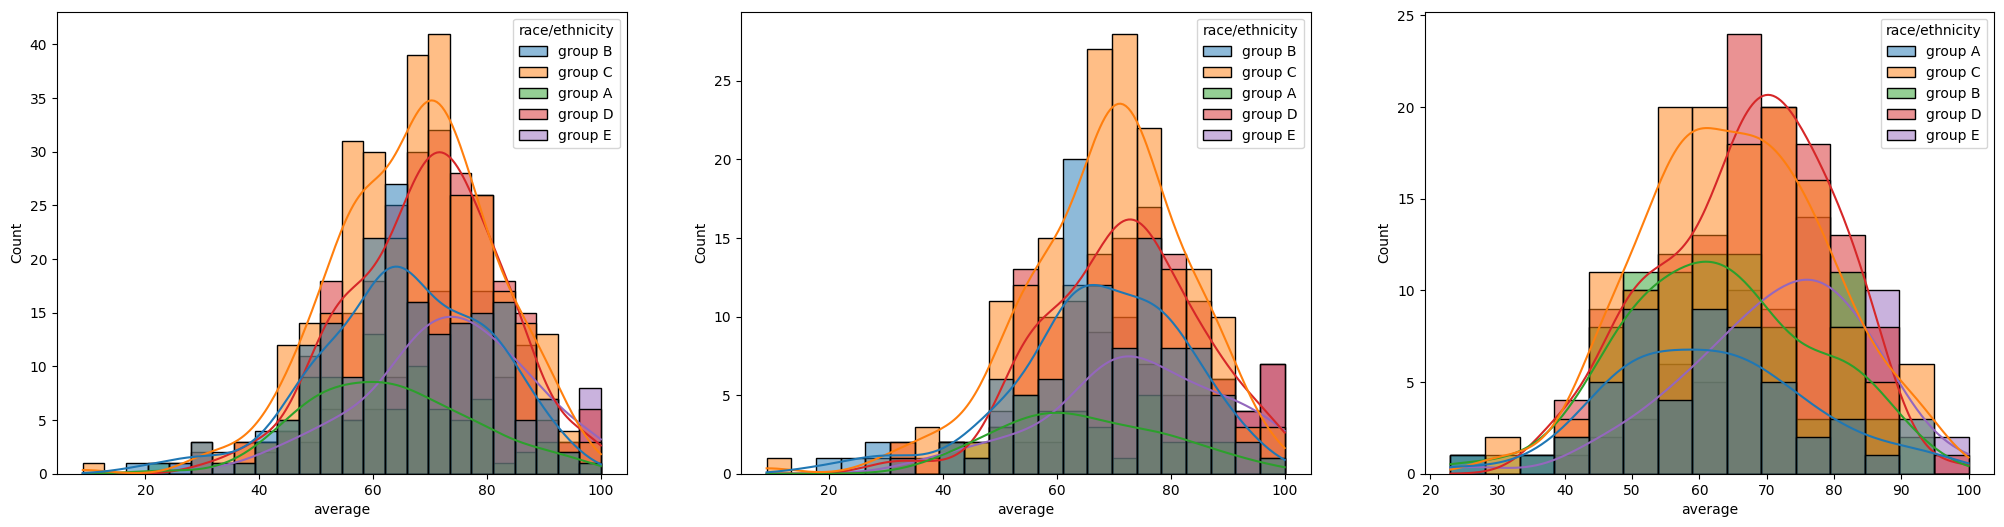

In [22]:
fig, ax=plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,3,1)
sns.histplot(data=df, x='average', kde=True, hue='race/ethnicity')
plt.subplot(1,3,2)
sns.histplot(data=df[df['gender']=='female'],x='average', kde=True, hue='race/ethnicity')
plt.subplot(1,3,3)
sns.histplot(data=df[df['gender']=='male'],x='average', kde=True, hue='race/ethnicity')
plt.show()

#### Insights

* Students of group A and group B tends to perform poorly in exam irrespective of the gender (whether they are male or female)

### 4.2 Maximumum score of students in all three subjects

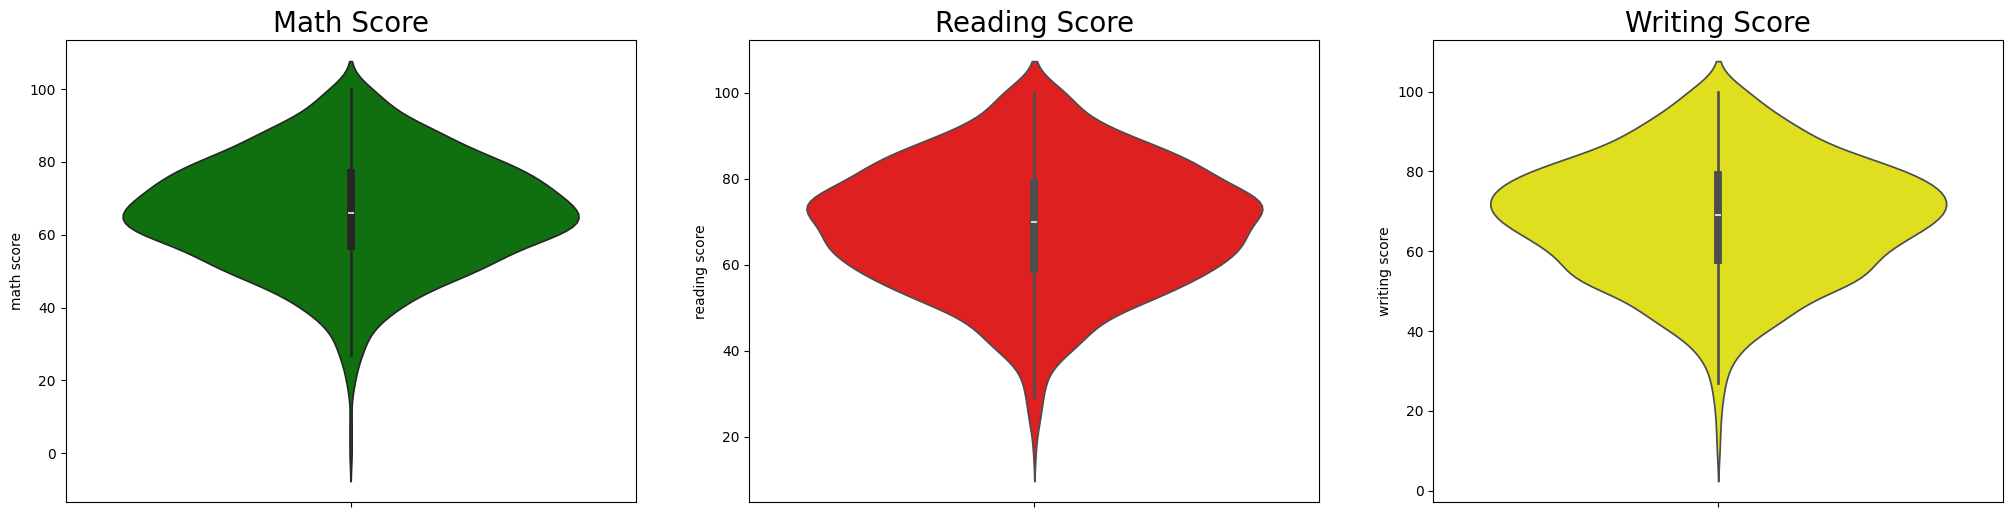

In [23]:
plt.figure(figsize=(25,6))
plt.subplot(1,3,1)
plt.title('Math Score', fontsize=20)
sns.violinplot(data=df, y='math score', color='green')
plt.subplot(1,3,2)
plt.title('Reading Score',fontsize=20)
sns.violinplot(data=df, y='reading score',color='red')
plt.subplot(1,3,3)
plt.title('Writing Score',fontsize=20)
sns.violinplot(data=df, y='writing score', color='yellow')
plt.show()   

#### Insights

* From the above three plots its clearly visible that maximum students have scored between 60 and 80 in maths
* In reading and writing, maximum students have scored between 50 and 80.

#### 4.3 Multivariate analysis using pieplot

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   total score                  1000 non-null   int64  
 9   average                      1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.2+ KB


In [25]:
df['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

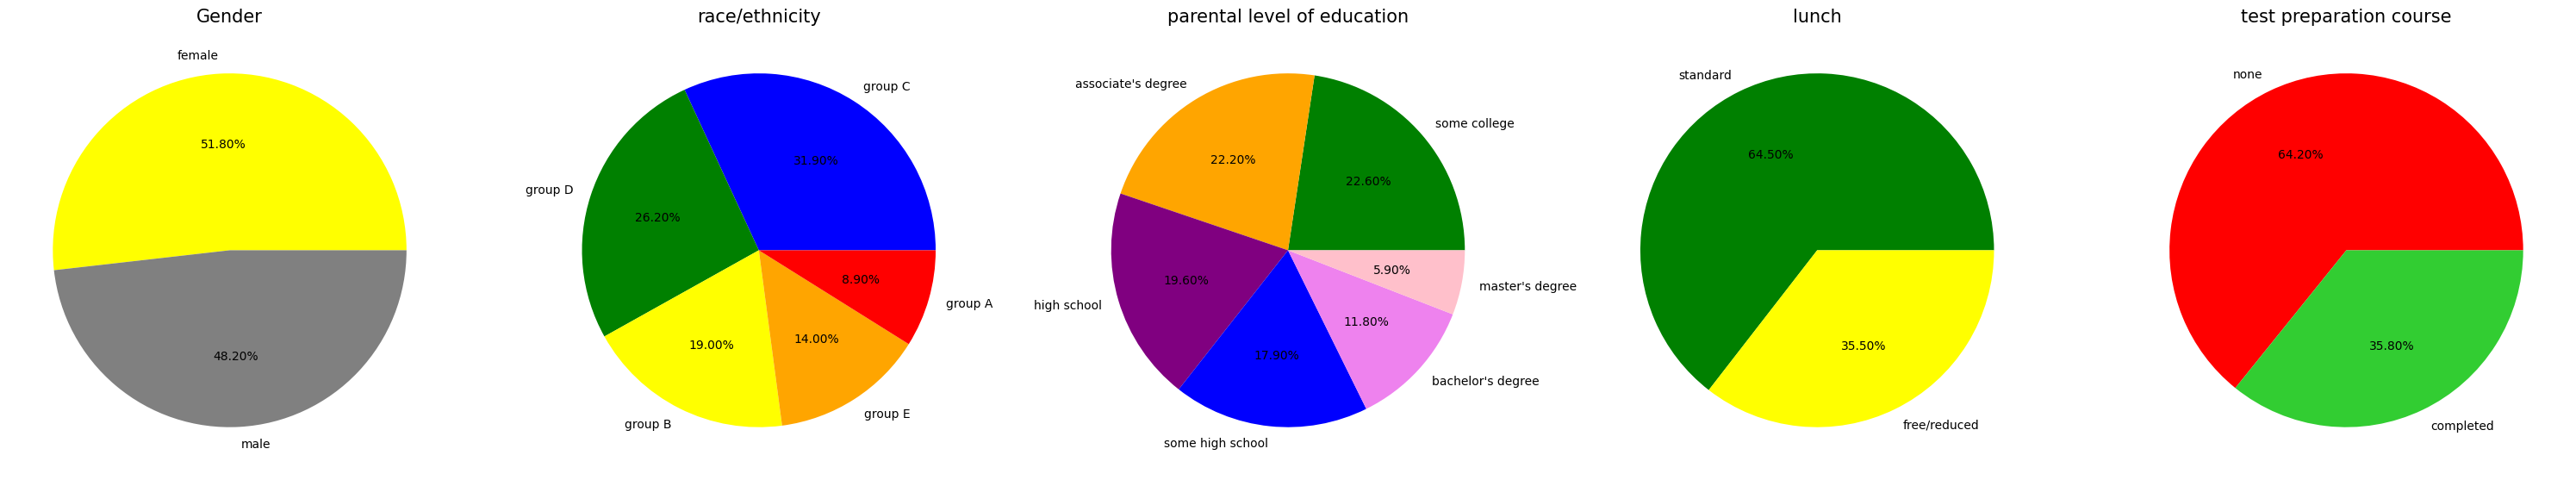

In [26]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels=['female','male']
colors=['yellow','grey']

plt.pie(size, labels=labels, colors=colors, autopct='%.2f%%')
plt.title('Gender', fontsize=15)
plt.axis('off')

plt.subplot(1,5,2)
size=df['race/ethnicity'].value_counts()
labels=['group C','group D','group B','group E','group A']
colors=['Blue','Green','Yellow','Orange','Red']

plt.pie(size, labels=labels, colors=colors, autopct='%.2f%%')
plt.title('race/ethnicity',fontsize=15)
plt.axis('off')

plt.subplot(1,5,3)
size=df['parental level of education'].value_counts()
labels=["some college","associate's degree","high school","some high school","bachelor's degree", "master's degree"]
colors=['Green', 'Orange', 'Purple', 'Blue', 'Violet', 'pink']

plt.pie(size, labels=labels, colors=colors, autopct='%0.2f%%')
plt.title('parental level of education', fontsize=15)
plt.axis('off')

plt.subplot(1,5,4)
size=df['lunch'].value_counts()
labels=['standard','free/reduced']
colors=['green', 'yellow']

plt.pie(size, labels=labels, colors=colors, autopct='%.2f%%')
plt.title('lunch',fontsize=15)
plt.axis('off')

plt.subplot(1,5,5)
size=df['test preparation course'].value_counts()
labels=['none','completed']
colors=['red', 'limegreen']

plt.pie(size, labels=labels, colors=colors, autopct='%0.2f%%')
plt.title('test preparation course', fontsize=15)
plt.axis('off')

plt.tight_layout()
plt.show()


#### Insights

* Number of male and female students are almost equal.
* Group C has highest number of students.
* Number of students whose parental education is 'Some college' is higher closely followed by the 'associate's degree'.
* Number of students with Standard lunch is higher.
* Number of students who have not enrolled for any courses are higher.

### 4.4 Feature Wise Visualization

#### 4.4.1 GENDER COLUMN

* How is distribution of Gender ?
* Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

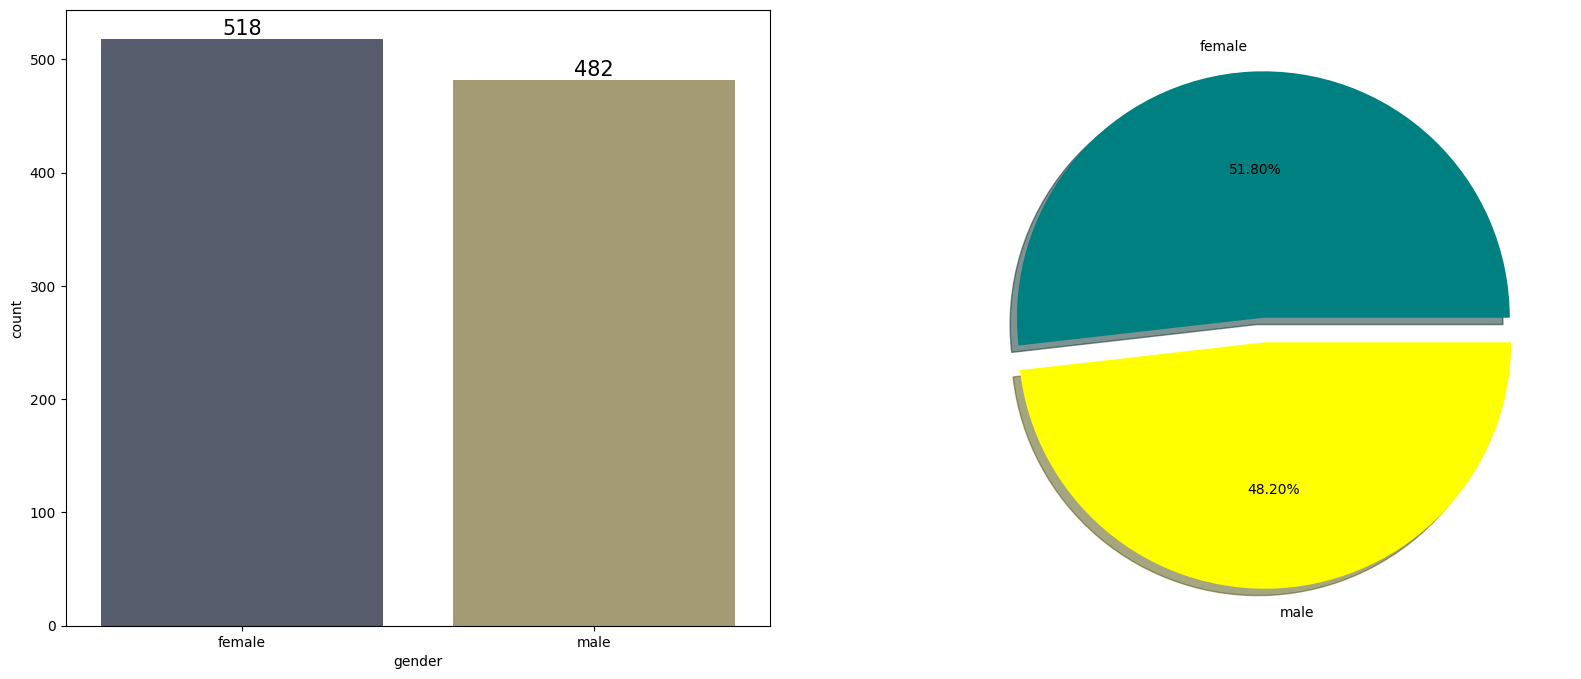

In [27]:
fig, ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['gender'], data= df, ax=ax[0], palette='cividis', saturation=0.95)
for containers in ax[0].containers:
    ax[0].bar_label(containers, color='black', fontsize=15)

size=df['gender'].value_counts()
labels=['female','male']
colors=['teal','yellow']

plt.pie(size, labels=labels, colors=colors, autopct='%.2f%%', explode=[0,0.1], shadow=True)
plt.show()

#### Insights

* Gender has balanced data with female 518 (51.8%) and male 482 (48.2%).

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [28]:
gender_group= df.groupby('gender').mean(numeric_only=True)
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


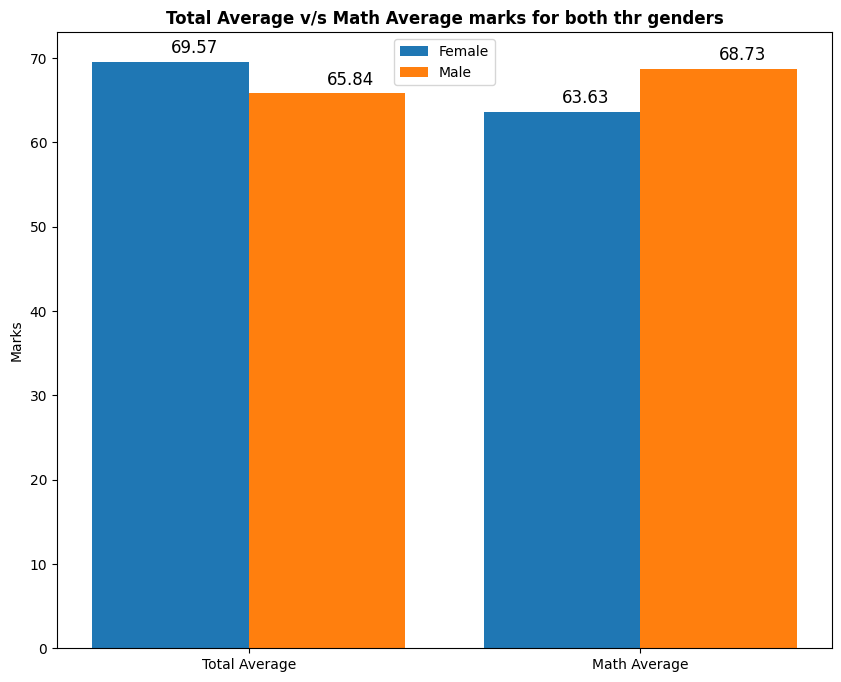

In [29]:
plt.figure(figsize=(10,8))

x=['Total Average', 'Math Average']

female_scores=[gender_group['average'][0], gender_group['math score'][0]]
male_scores=[gender_group['average'][1], gender_group['math score'][1]]

x_axis=np.arange(len(x))

plt.bar(x_axis - 0.2, female_scores, 0.4, label='Female')
plt.bar(x_axis + 0.2, male_scores, 0.4, label='Male')

for i,score in enumerate(female_scores):
    plt.text(i - 0.2, score + 1, str(round(score,2)), color='black', fontsize=12)

for i, score in enumerate(male_scores):
    plt.text(i + 0.2, score+1, str(round(score,2)), color='black', fontsize=12)

plt.xticks(x_axis,x)
plt.ylabel('Marks')
plt.title('Total Average v/s Math Average marks for both thr genders', fontweight='bold')
plt.legend()
plt.show()

#### Insights

* On an average, females have better overall score than males.
* In maths, males have higher scores as compared to females.

### 4.4.2 RACE/EHNICITY COLUMN

* How is Group wise distribution ?
* Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

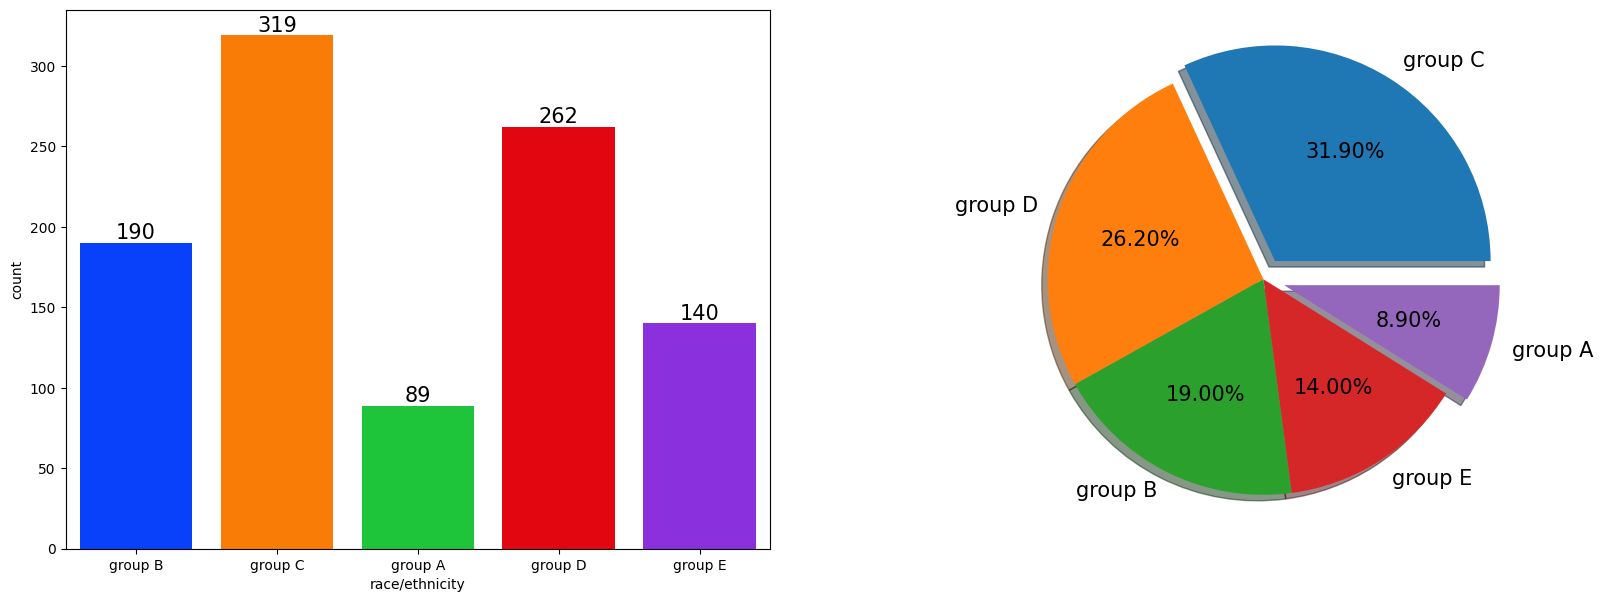

In [30]:
fig, ax=plt.subplots(1,2, figsize=(20,7))
plt.rcParams['font.size']=15
sns.countplot(x=df['race/ethnicity'], data=df, ax=ax[0], saturation=0.95, palette='bright')
for containers in ax[0].containers:
    ax[0].bar_label(containers, color='black',size=15)

size=df['race/ethnicity'].value_counts()
labels=df['race/ethnicity'].value_counts().index

plt.pie(size, labels=labels, autopct='%.2f%%', explode=[0.1,0,0,0,0.1],shadow=True)
plt.show()

#### Insights

* Most of the students belong to Group C.
* Least number of students belong to Group A.

### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

In [31]:
group_race=df.groupby('race/ethnicity').mean(numeric_only=True)
group_race

,math score,reading score,writing score,total score,average
race/ethnicity,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.992509
group B,63.452632,67.352632,65.600000,196.405263,65.468421
group C,64.463950,69.103448,67.827586,201.394984,67.131661
group D,67.362595,70.030534,70.145038,207.538168,69.179389
group E,73.821429,73.028571,71.407143,218.257143,72.752381


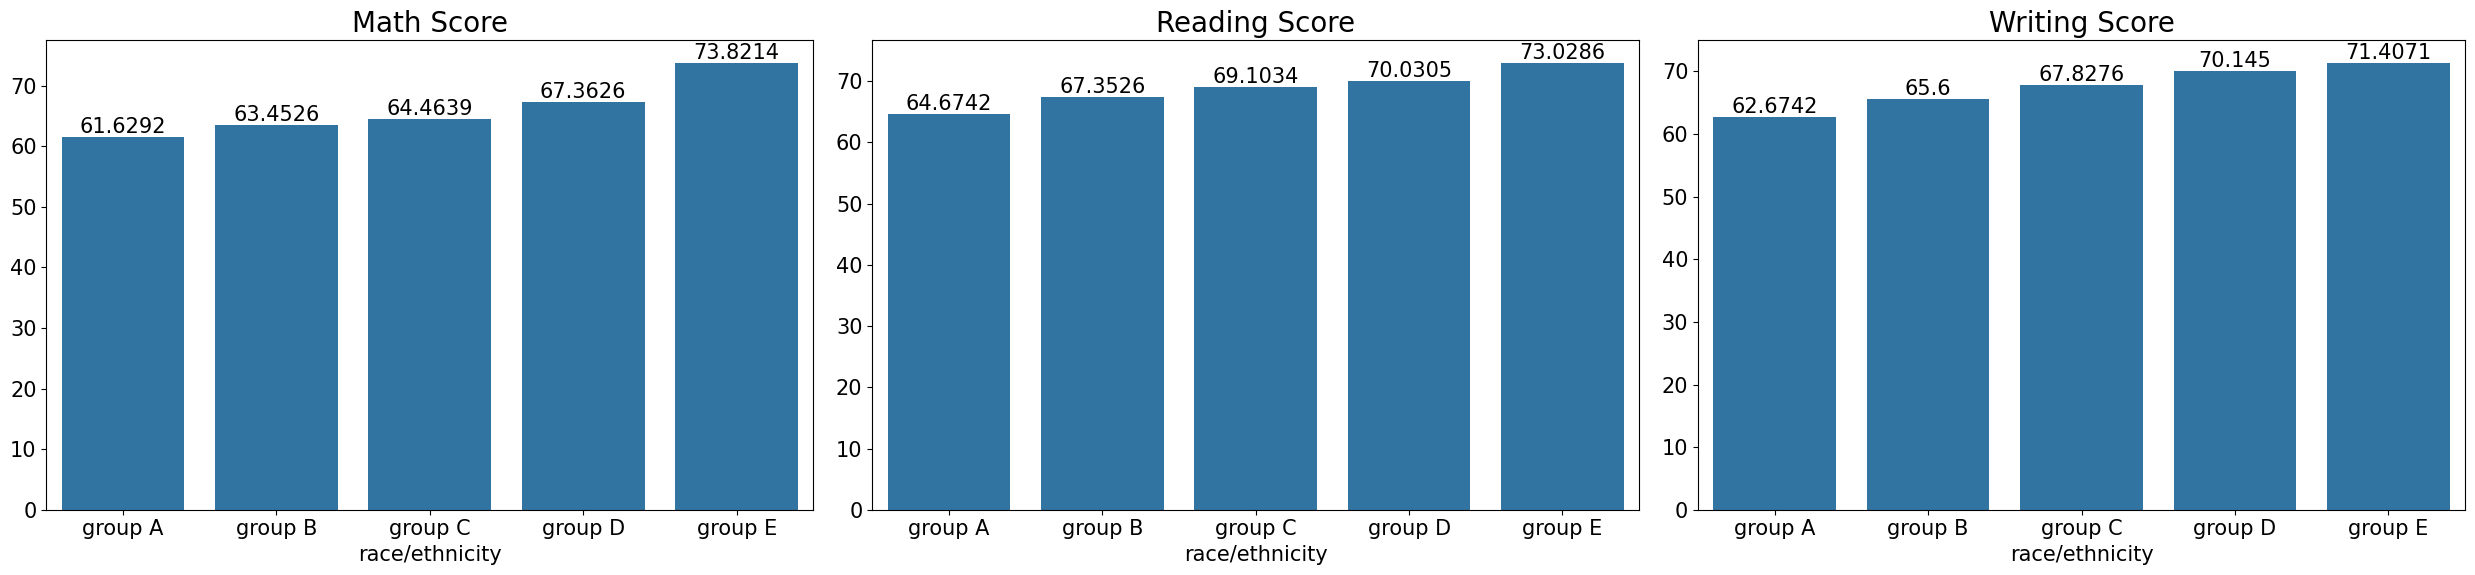

In [32]:
fig, ax=plt.subplots(1,3,figsize=(25,6))
sns.barplot(x=group_race['math score'].index, y=group_race['math score'].values,ax=ax[0])
ax[0].set_title('Math Score', color='black', size=20)

for containers in ax[0].containers:
    ax[0].bar_label(containers, color='black',size=15)

sns.barplot(x=group_race['reading score'].index, y=group_race['reading score'].values, ax=ax[1])
ax[1].set_title('Reading Score', color='black',size=20)

for containers in ax[1].containers:
    ax[1].bar_label(containers, color='black', size=15)

sns.barplot(x=group_race['writing score'].index, y=group_race['writing score'].values,ax=ax[2])
ax[2].set_title('Writing Score', color='black', size=20)

for containers in ax[2].containers:
    ax[2].bar_label(containers, color='black', size=15)

plt.tight_layout()

plt.show()

#### Insights

* Group E students have scored highest marks in all subjects.
* Group A students have scored lowest marks in all subjects.

### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN

* What is educational background of student's parent ?
* Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

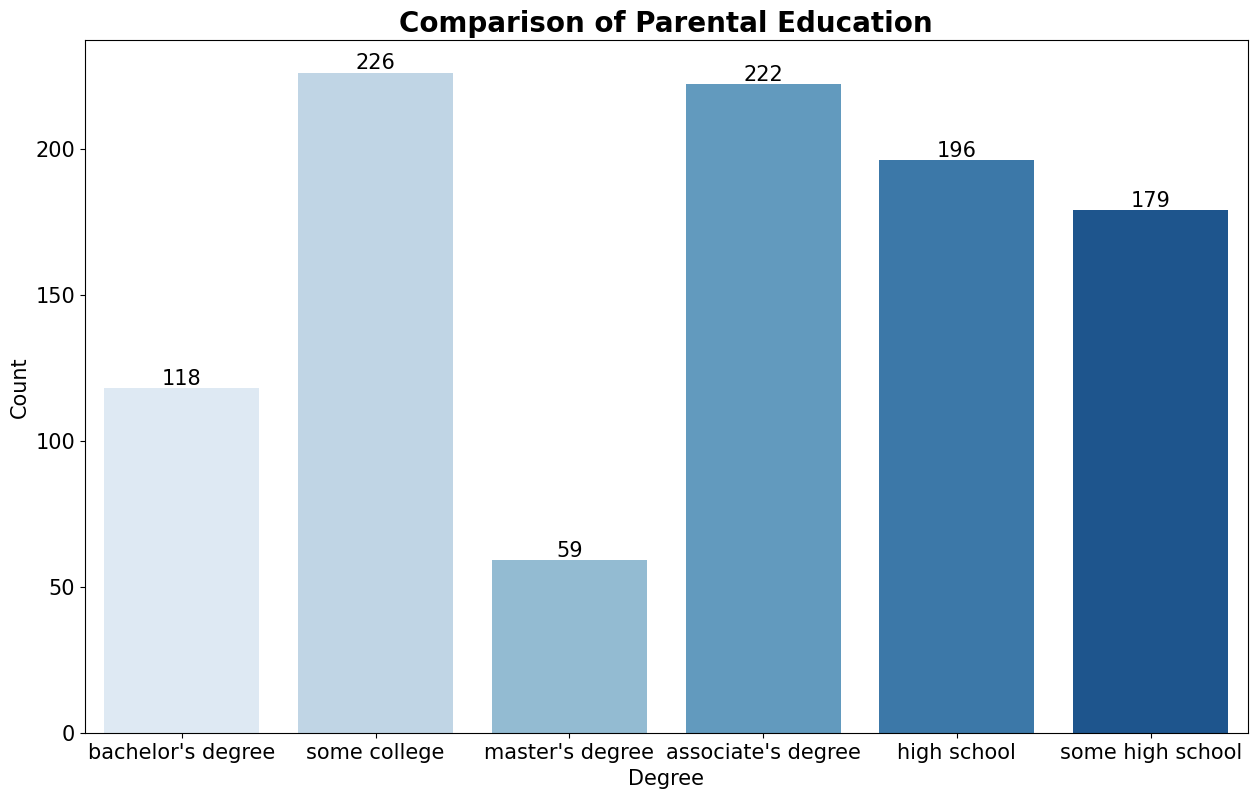

In [33]:
plt.rcParams['figure.figsize']=(15,9)

count=sns.countplot(x=df['parental level of education'], data= df, palette='Blues')

for containers in count.containers:
    count.bar_label(containers,color='black',size=15)
    
plt.title('Comparison of Parental Education', fontsize=20, fontweight='bold')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

#### Insights

* Large number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

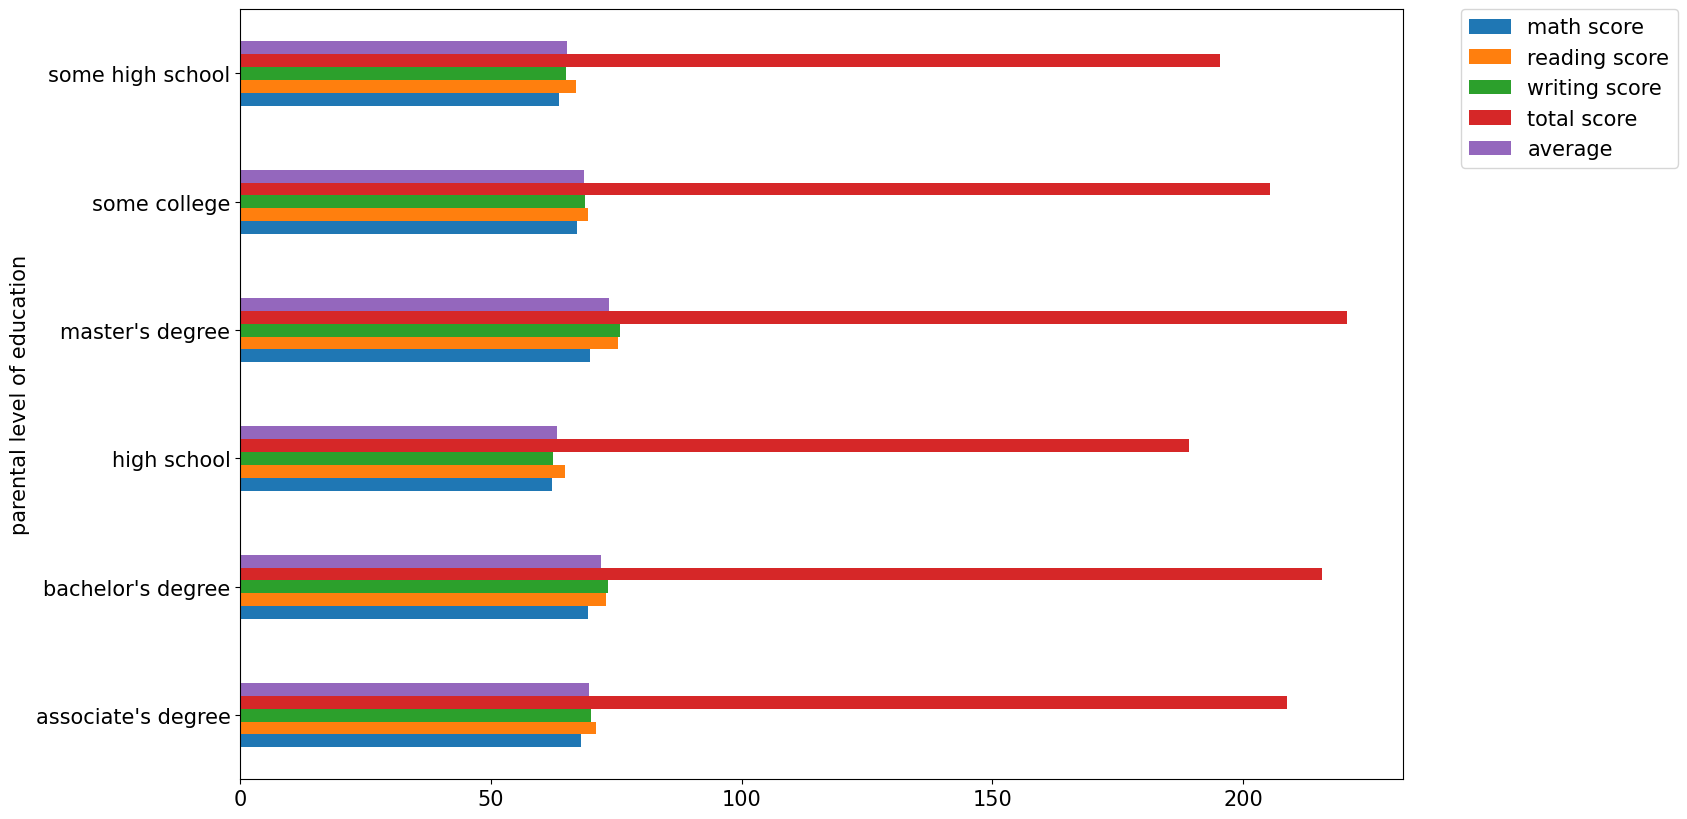

In [34]:
df.groupby('parental level of education').mean(numeric_only=True).plot(kind='barh', figsize=(15,10))
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.show()

#### Insights

* The score of students whose parents have marter's degree and bachelor's level education are higher than others.

### 4.4.4 LUNCH COLUMN

* Which type of lunch is most common amoung students ?
* What is the effect of lunch type on test results?

#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

In [35]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

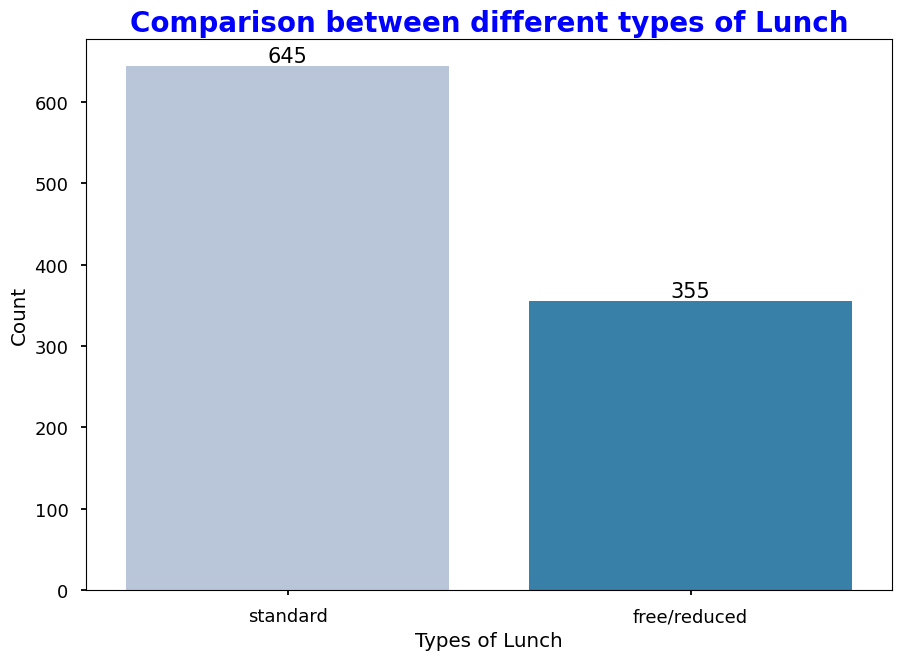

In [36]:
plt.rcParams['figure.figsize']=(15,9)
plt.style.use('seaborn-v0_8-talk')
count=sns.countplot(x=df['lunch'], data= df, palette='PuBu')
for containers in count.containers:
    count.bar_label(containers, color='black',size=15)
plt.title('Comparison between different types of Lunch', fontsize=20, fontweight='bold', color='blue')
plt.xlabel('Types of Lunch')
plt.ylabel('Count')
plt.show()

#### Insights

* Standard Lunch is most common among students than free/reduced lunch.

#### BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

In [37]:
group_lunch=df.groupby('lunch').mean(numeric_only=True)
group_lunch

,math score,reading score,writing score,total score,average
lunch,,,,,
free/reduced,58.921127,64.653521,63.022535,186.597183,62.199061
standard,70.034109,71.654264,70.823256,212.511628,70.837209


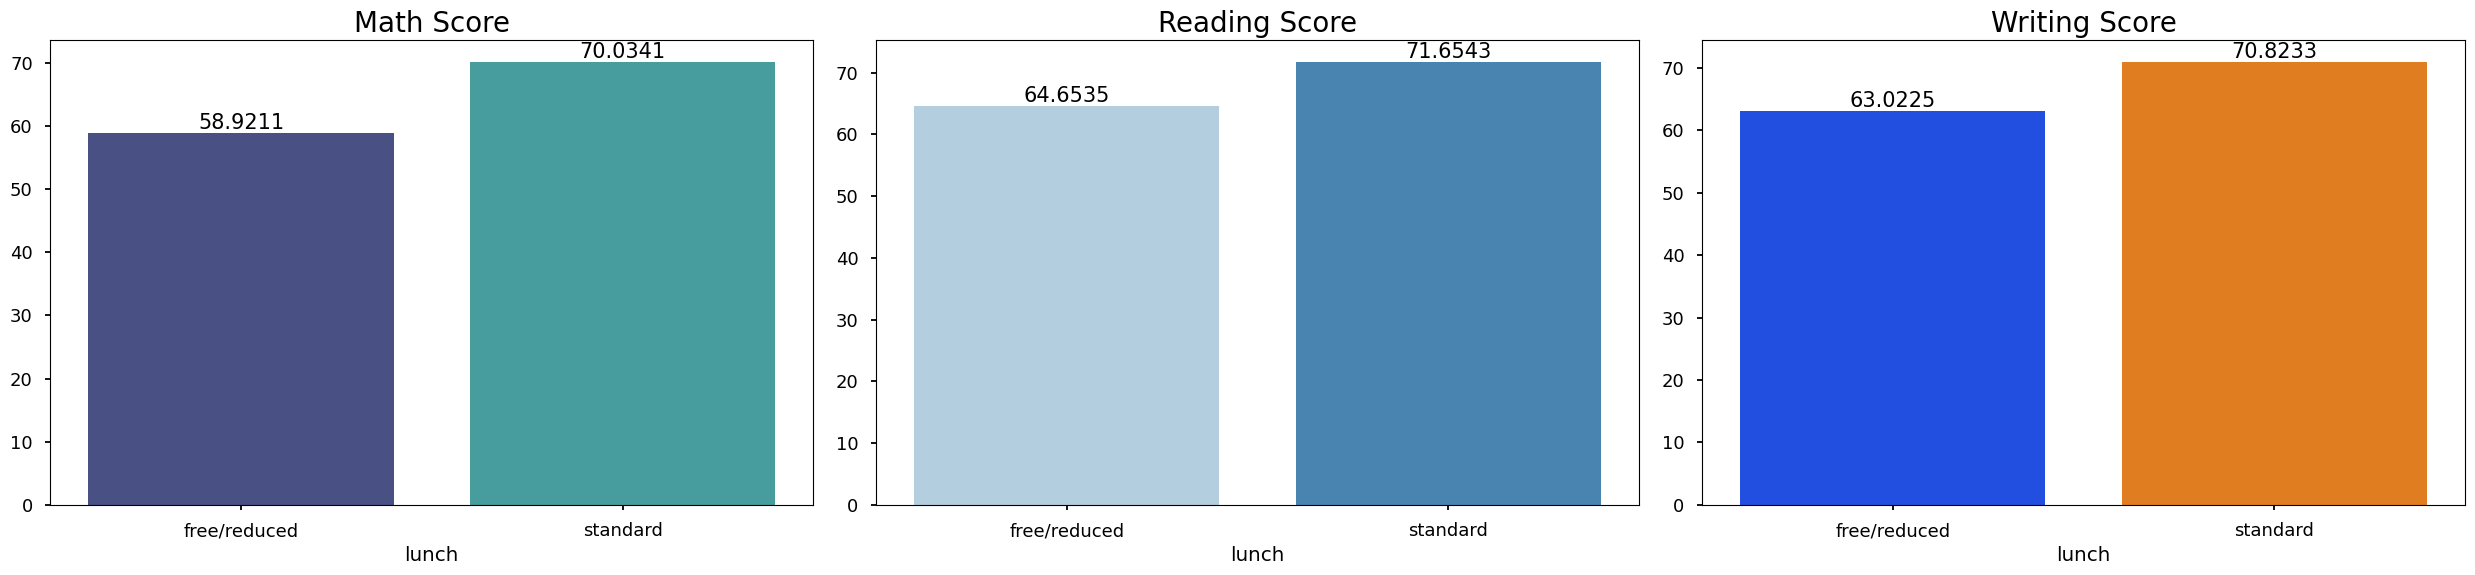

In [38]:
fig,ax=plt.subplots(1,3,figsize=(25,6))
sns.barplot(x=group_lunch['math score'].index, y=group_lunch['math score'].values,palette='mako',ax=ax[0])
ax[0].set_title('Math Score', color='black',size=20)

for containers in ax[0].containers:
    ax[0].bar_label(containers,color='black',size=15)

sns.barplot(x=group_lunch['reading score'].index, y=group_lunch['reading score'].values, palette='Blues', ax=ax[1])
ax[1].set_title('Reading Score', color='black', size=20)

for containers in ax[1].containers:
    ax[1].bar_label(containers,color='black',size=15)

sns.barplot(x=group_lunch['writing score'].index, y=group_lunch['writing score'].values, palette='bright', ax=ax[2])
ax[2].set_title('Writing Score', color='black', size=20)

for containers in ax[2].containers:
    ax[2].bar_label(containers, color='black', size=15)

plt.tight_layout()
plt.show()

#### Insights

* Studnets who get standard lunch tend to perform better than students who get free/reduced lunch in all three subjects.

### 4.4.5 TEST PREPARATION COURSE COLUMN

* Which type of test preparation course is most common amoung students ?
* Is Test prepration course has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( Which type of Test prepation course is most common amoung students ? )

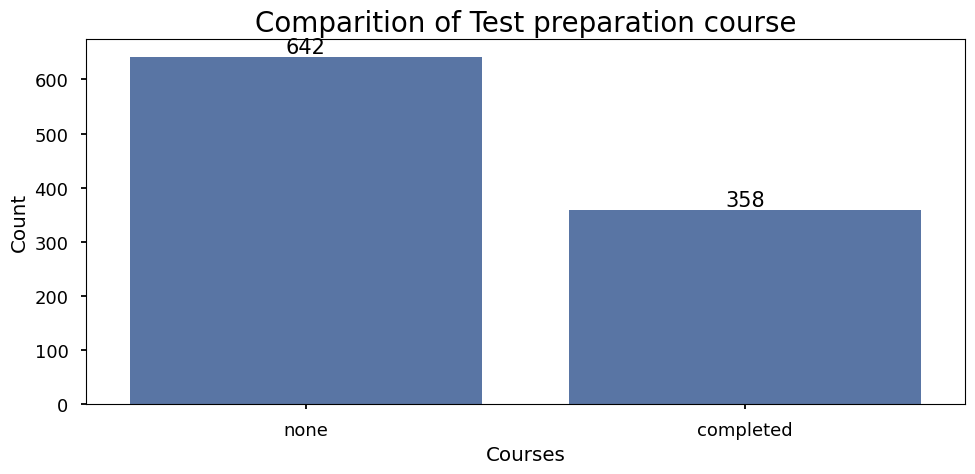

In [39]:
plt.figure(figsize=(10,5))
plt.style.use('seaborn-v0_8-deep')
count=sns.countplot(x=df['test preparation course'], data= df)
for containers in count.containers:
    count.bar_label(containers, color='black',size=15)
plt.title('Comparition of Test preparation course', size=20)
plt.xlabel('Courses')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#### Insights

* Maximum students have not opted for test preparation course almost around 50%.

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

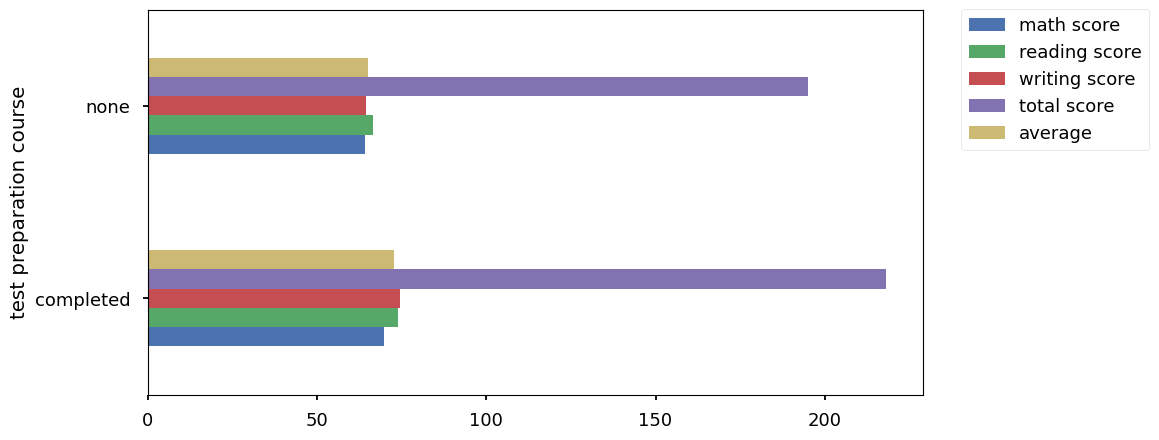

In [40]:
df.groupby('test preparation course').mean(numeric_only=True).plot(kind='barh', figsize=(10,5))
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()

#### Insights

* Students who have completed test preparation course have higher scores as compared to students who haven't taken the course.

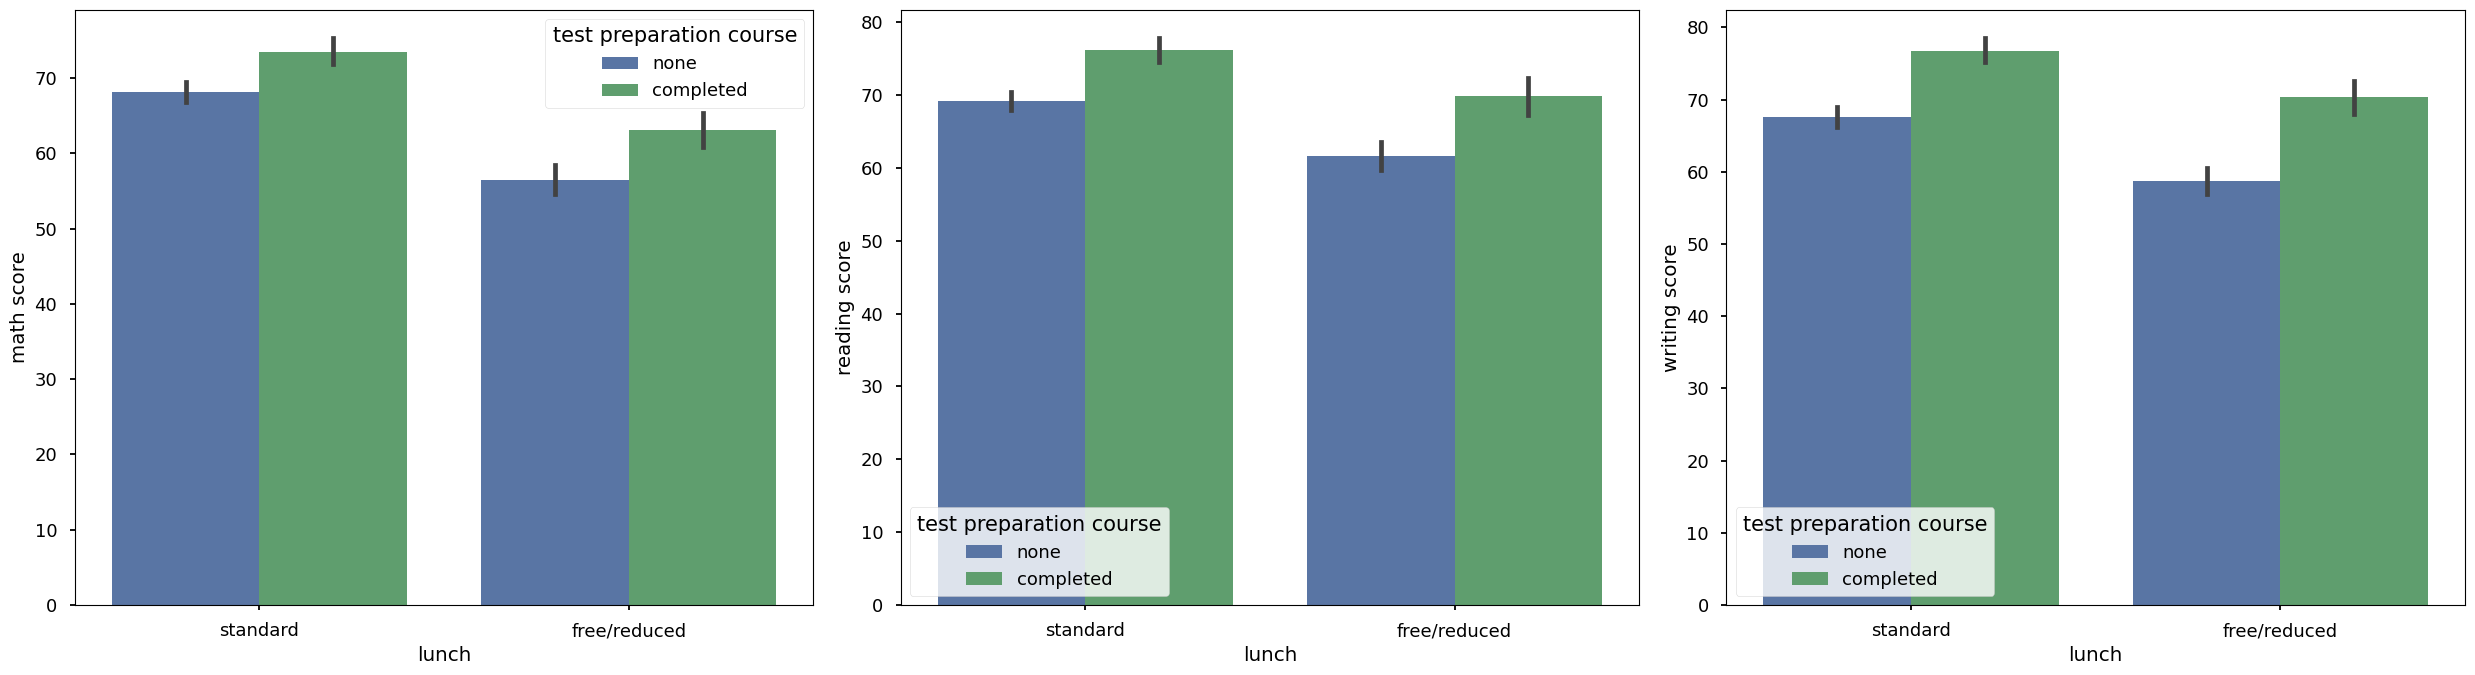

In [41]:
fig, ax= plt.subplots(1,3,figsize=(25,7))
plt.subplot(1,3,1)
sns.barplot(x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(1,3,2)
sns.barplot(x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(1,3,3)
sns.barplot(x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])
plt.tight_layout()
plt.show()

#### Insights

* Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

### 4.4.6 CHECKING OUTLIERS

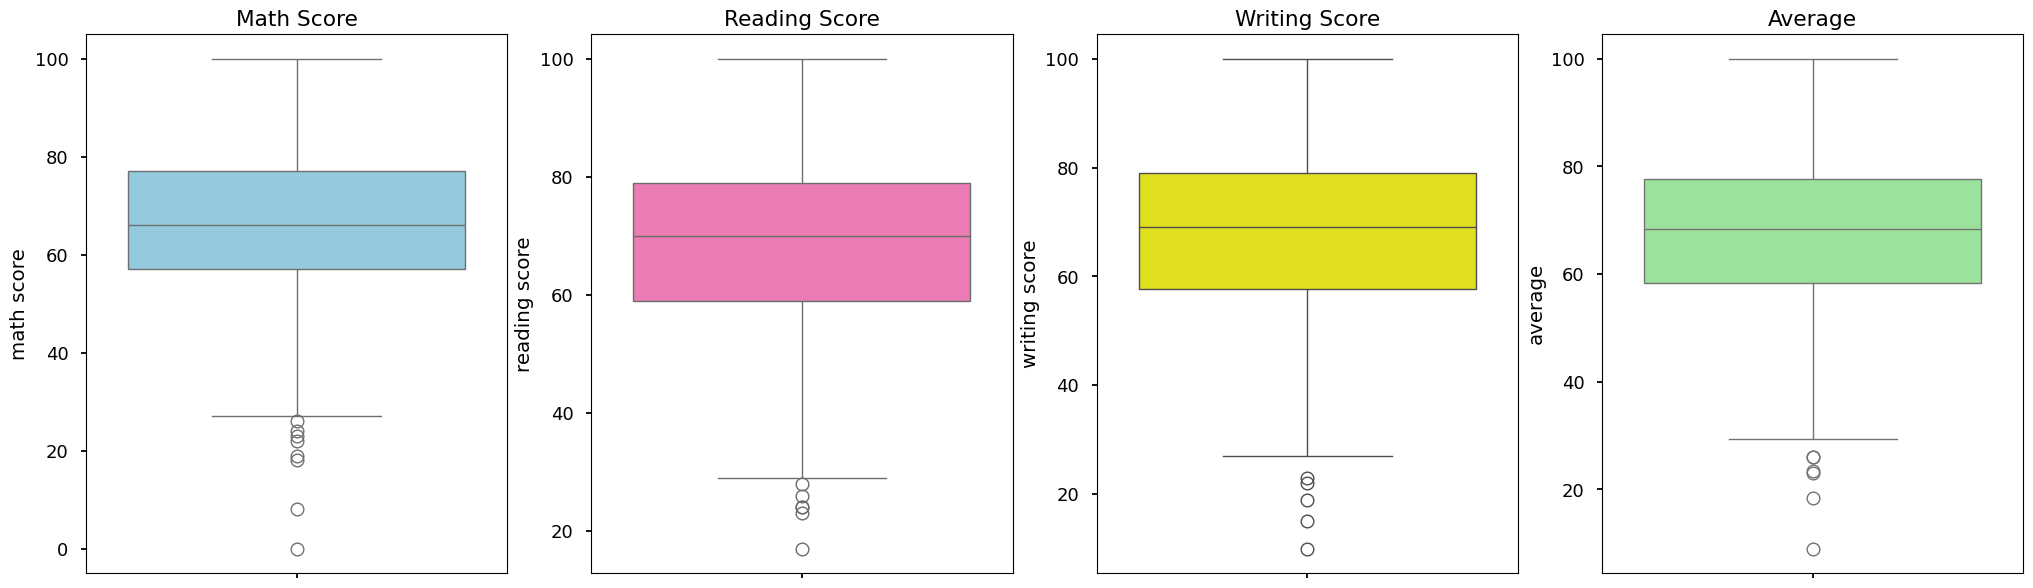

In [42]:
fig, ax=plt.subplots(1,4, figsize=(25,7))
plt.subplot(1,4,1)
sns.boxplot(df['math score'],color='skyblue')
plt.title('Math Score')
plt.subplot(1,4,2)
sns.boxplot(df['reading score'],color='hotpink')
plt.title('Reading Score')
plt.subplot(1,4,3)
sns.boxplot(df['writing score'],color='yellow')
plt.title('Writing Score')
plt.subplot(1,4,4)
sns.boxplot(df['average'],color='lightgreen')
plt.title('Average')
plt.show()

### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

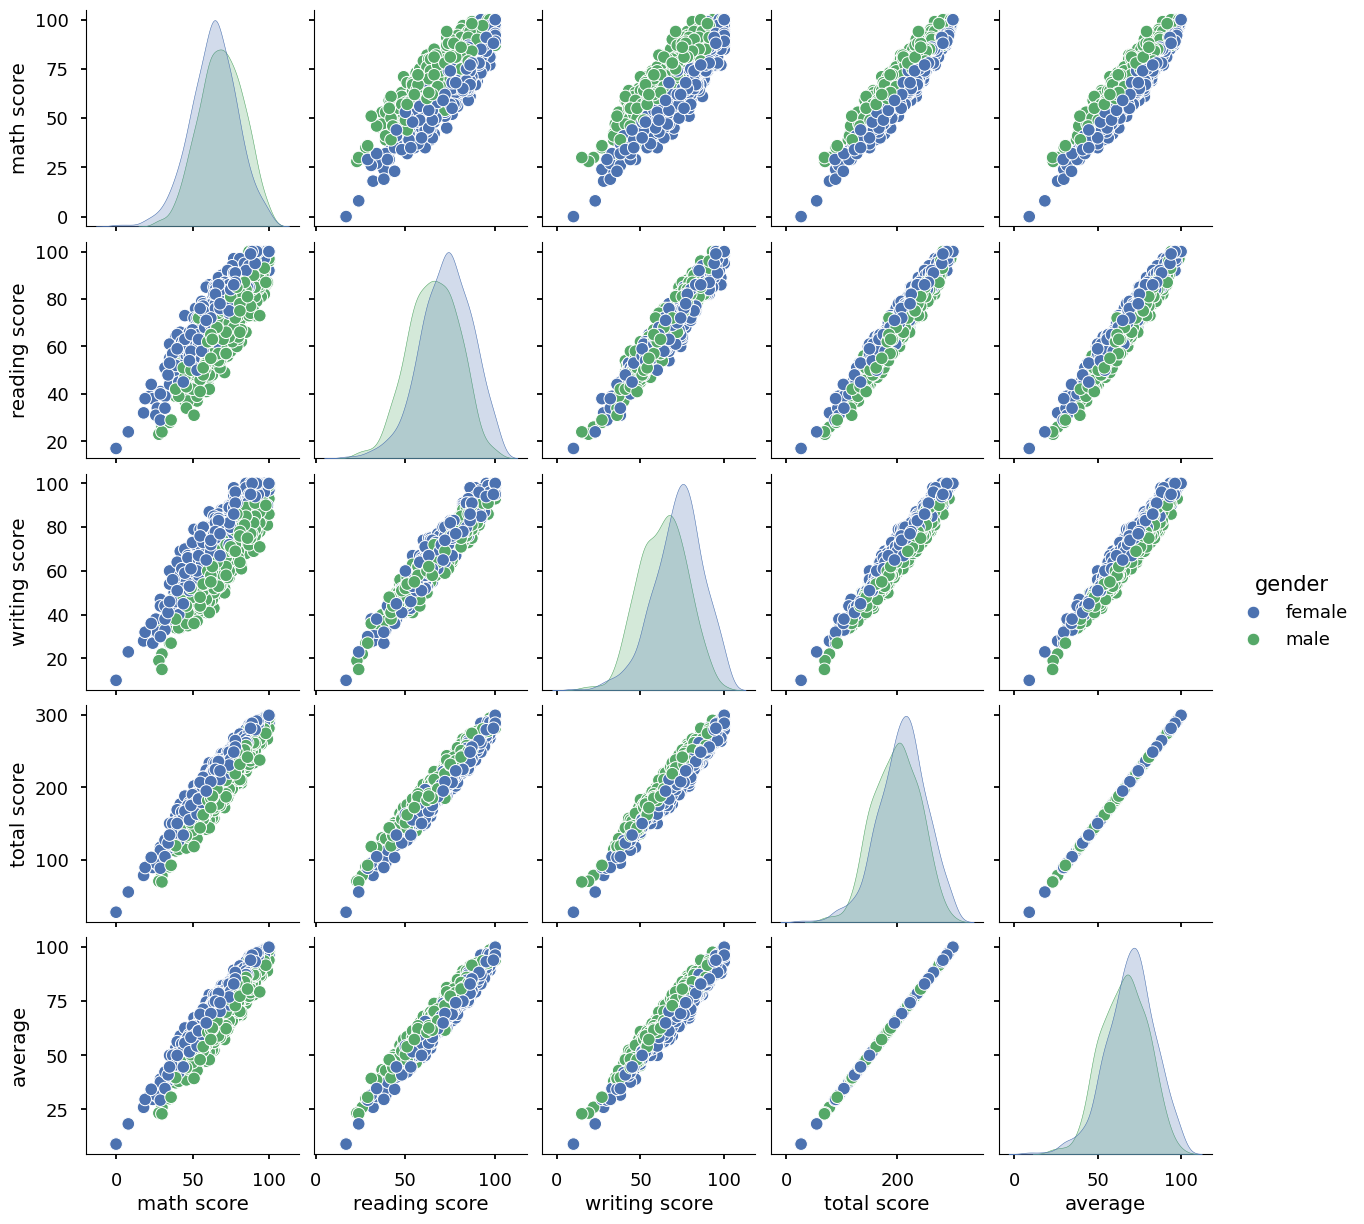

In [43]:
sns.pairplot(df, hue='gender')
plt.show()

#### Insights

* From the above plot, it is clear that all the scores are increasing linearly with each other.

### 5. Conclusions

* Student's performace is related with lunch, race, paternal level education.
* Females lead in pass percentage and also are top-scorers
* Student's Performance is not much related with test preparation course
* Finishing preparation course is benefitial.